In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# update view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# read table for medication doses taken over 24 week period
m = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRDOS.csv')

display(m.shape) # check shape and head
m[:5]

(160908, 19)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,DOS002,DOS002_UNIT,DOS002_NORM,DOS005,DOS005_UNIT,DOS005_NORM,DOS006,DOS006_UNIT,DOS006_NORM,VISITDT,DOS001,DOS001_DT,VISITDT_Dt,patdeid
0,NaN,NaN,WK0,NaN,15034,2.0,NaN,2.0,8.0,NaN,8.0,1.0,NaN,1.0,NaN,NaN,.,0.0,1
1,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,16.0,NaN,16.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
2,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
3,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
4,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,32.0,NaN,32.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1


In [3]:
# retrieve column names
m.columns

Index(['PATIENTNUMBER', 'SITE', 'VISIT', 'PATIENTID', 'VISITID', 'DOS002',
       'DOS002_UNIT', 'DOS002_NORM', 'DOS005', 'DOS005_UNIT', 'DOS005_NORM',
       'DOS006', 'DOS006_UNIT', 'DOS006_NORM', 'VISITDT', 'DOS001',
       'DOS001_DT', 'VISITDT_Dt', 'patdeid'],
      dtype='object')

In [4]:
# drop columns whose data we are not using for this analysis

m = m.drop(columns=['PATIENTNUMBER','DOS001','SITE', 'PATIENTID', 'VISITID','DOS002_UNIT', 'DOS002_NORM','DOS005_UNIT', 'DOS005_NORM','DOS006_UNIT', 'DOS006_NORM', 'VISITDT','DOS001_DT', 'VISITDT_Dt'], axis=1)

m[:1] # check column names

,VISIT,DOS002,DOS005,DOS006,patdeid
0,WK0,2.0,8.0,1.0,1


In [5]:
# rename columns according to documentation for interpretability

new_columns = {'DOS002':'medication','DOS005':'total_dose','DOS006':'admin_location'}


In [6]:
# renaming columns

m = m.rename(columns=new_columns)

m[:1] # check column names

,VISIT,medication,total_dose,admin_location,patdeid
0,WK0,2.0,8.0,1.0,1


In [7]:
# reorder columns for easier interpretation

m = m.reindex(columns=['patdeid','VISIT','medication','total_dose','admin_location'])

m[:1] # check column names

,patdeid,VISIT,medication,total_dose,admin_location
0,1,WK0,2.0,8.0,1.0


In [8]:
# filter view to specific patient ID
# use groupby to index by VISIT to view all 24 visits and values for each visit

m.loc[m.patdeid==1].groupby('VISIT').agg('first')

,patdeid,medication,total_dose,admin_location
VISIT,,,,
WK0,1,2.0,8.0,1.0
WK1,1,2.0,16.0,1.0
WK10,1,2.0,32.0,1.0
WK11,1,2.0,32.0,1.0
WK12,1,2.0,32.0,2.0
WK13,1,NaN,NaN,NaN
WK14,1,2.0,32.0,1.0
WK15,1,2.0,32.0,1.0
WK16,1,2.0,30.0,2.0


### There were issues with data collection for medication dose, notice the 0.0 values.  We will forward fill those values to maintain accuracy

In [9]:
# convert 0.0 value in total_dose to NaN
m['total_dose'] = m['total_dose'].replace(0.0, np.nan)

# in total_dose column, front fill nan values
m['total_dose'] = m['total_dose'].fillna(method='ffill')

### Now we will do some EDA

In [10]:
# clean up the VISIT column to provide ordinal value

m['VISIT'] = m['VISIT'].str.replace('WK','')

In [11]:
# change VISIT column to np.int64

m['VISIT'] = m['VISIT'].astype(np.int64)

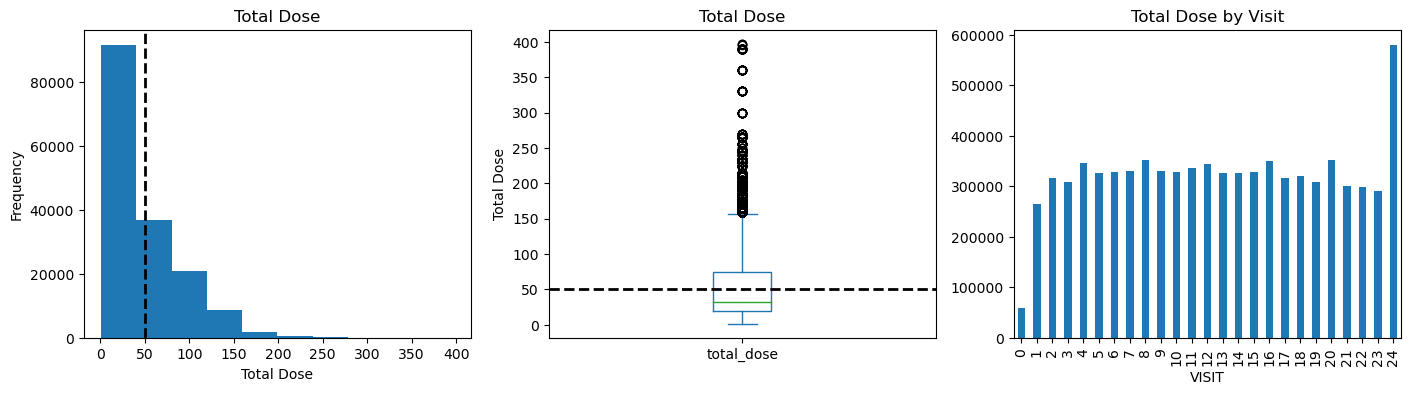

In [12]:
# show distribution of medication dose and outliers
fig, ax = plt.subplots(1,3, figsize=(17,4))
m.total_dose.plot(kind='hist', ax=ax[0], title='Total Dose')
m.total_dose.plot(kind='box', ax=ax[1], title='Total Dose')
m.groupby(['VISIT']).agg({'total_dose':'sum'}).plot(kind='bar', ax=ax[2],figsize=(17,4), title='Total Dose by Visit',legend=False)
#m.medication.value_counts().plot(kind='pie', ax=ax[2], title='Medication', autopct='%1.1f%%')
ax[0].set_xlabel('Total Dose')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Total Dose')
ax[0].axvline(m.total_dose.mean(), color='black', linestyle='--', lw=2)
ax[1].axhline(m.total_dose.mean(), color='black', linestyle='--', lw=2)
ax[2].set_ylabel(None)
plt.show()

### Dive into each column and map values to binary (1 else 0)

In [13]:
m.medication.value_counts() # show value counts for medication column

medication
2.0    79571
1.0    79054
Name: count, dtype: int64

In [14]:
# print length of patdeid column, numbe of patients is consistent with CTN protocol
m.patdeid.nunique()

1315

In [15]:
display(m.admin_location.value_counts()) # show value counts for admin_location column
display(m.admin_location.value_counts(normalize=True)) # show percent distribution

admin_location
1.0    137214
2.0     21333
Name: count, dtype: int64

admin_location
1.0    0.865447
2.0    0.134553
Name: proportion, dtype: float64

In [16]:
# location doesn't provide significant predictive value, drop column
m = m.drop(columns=['admin_location'], axis=1)

There appears to be an issues with duplicates; requires further analysis

In [17]:
# sample random patient IDs to see pattern for duplicates

# create feature to pull random sample from patdeid column
def random_patient(df):
    return df.sample(1).patdeid.values[0]


In [18]:
# show view for patients 25 rows at a time
m.loc[m.patdeid==random_patient(m)][25:50]

,patdeid,VISIT,medication,total_dose
4349,55,4,1.0,80.0
4350,55,4,1.0,80.0
4351,55,4,1.0,80.0
4352,55,5,1.0,80.0
4353,55,5,1.0,80.0
4354,55,5,1.0,80.0
4355,55,5,1.0,80.0
4356,55,5,1.0,80.0
4357,55,5,1.0,80.0
4358,55,5,1.0,80.0


### If we look closely at the data, each patient has multiple entries for medication that appear as duplicates. These are not duplicate entires, just an unintuitive way to track medication doses at the dose level. Having absolute values for weekly doses creates problems for feature engineering, as there are 1,600 possible data points for medication doses.  If we create this many features, our dataset will become overly sparse and dilute predictive capabilities.  Therefore, we will aggregate the total medication consumed per week and measure the average medication consumed per week or per day.

### We will take  a few steps to reshape the dataframe from approximately 106,000 rows, to 1 row per patient.

- First, we will create a column that counts how many weeks of treatment each patient completed<br>
- Then we will aggregate the total amount of medication each patient consumed within 24 weeks<br>
- The two data points above will allow use to calculate the average daily and weekly dose per patient<br>

Reshaping the data in this way protects the data integrity and reduces the number of erroneous features and improves accuracy for machine learning


In [19]:
# create column total_visists which counts unique values in VISIT column for each patient
m['total_visits'] = m.groupby('patdeid')['VISIT'].transform('nunique')

In [20]:
m[:5]

,patdeid,VISIT,medication,total_dose,total_visits
0,1,0,2.0,8.0,25
1,1,1,2.0,16.0,25
2,1,1,2.0,24.0,25
3,1,1,2.0,24.0,25
4,1,1,2.0,32.0,25


In [21]:
# create feature that pulls random number from patdeid
def random_patient(df):
    return df.sample(1).patdeid.values[0]

In [22]:
m.loc[m.patdeid==random_patient(m)][:25]

,patdeid,VISIT,medication,total_dose,total_visits
62721,776,0,2.0,16.0,25
62722,776,0,2.0,16.0,25
62723,776,0,2.0,20.0,25
62724,776,0,2.0,20.0,25
62725,776,0,2.0,20.0,25
62726,776,0,2.0,20.0,25
62727,776,1,2.0,20.0,25
62728,776,1,2.0,20.0,25
62729,776,1,2.0,20.0,25
62730,776,1,2.0,20.0,25


In [23]:
# apply aggregation to total dose column to show the sum of medication consumed per week

m.groupby(['patdeid','VISIT']).agg({'medication':'first','total_visits':'first','total_dose':'sum'}).reset_index()

# aggregate medication dose to show the first dose and then the sum of medication consumed per week


,patdeid,VISIT,medication,total_visits,total_dose
0,1,0,2.0,25,8.0
1,1,1,2.0,25,160.0
2,1,2,2.0,25,320.0
3,1,3,2.0,25,192.0
4,1,4,2.0,25,384.0
...,...,...,...,...,...
23523,1931,20,2.0,25,84.0
23524,1931,21,2.0,25,84.0
23525,1931,22,2.0,25,224.0
23526,1931,23,NaN,25,8.0


In [24]:
# assign name to new df
m_agg1 = m.groupby(['patdeid','VISIT']).agg({'medication':'first','total_visits':'first','total_dose':'sum'}).reset_index()

In [25]:
m_agg1[:5]

,patdeid,VISIT,medication,total_visits,total_dose
0,1,0,2.0,25,8.0
1,1,1,2.0,25,160.0
2,1,2,2.0,25,320.0
3,1,3,2.0,25,192.0
4,1,4,2.0,25,384.0


In [26]:
# aggregate total medicatio of each patient for their entire treatment period
m_agg2 = m_agg1.groupby(['patdeid']).agg({'medication':'first','total_visits':'first','total_dose':'sum'}).reset_index()

In [27]:
m_agg2[:5]

,patdeid,medication,total_visits,total_dose
0,1,2.0,25,5196.0
1,2,2.0,25,1948.0
2,3,1.0,25,13065.0
3,4,2.0,25,5320.0
4,6,2.0,3,48.0


In [28]:
# round total dose to whole number
m_agg2['total_dose'] = m_agg2['total_dose'].round(0)

In [29]:
# create column to show average dose per week and round to whole number for both columns
m_agg2['avg_weekly_dose'] = round(m_agg2['total_dose']/m_agg2['total_visits'],0)

In [30]:
# create column avg_daily_dose which is the average weekly dose divided by 7
m_agg2['avg_daily_dose'] = round(m_agg2['avg_weekly_dose']/7,0)

In [31]:
m_agg2[:5]

,patdeid,medication,total_visits,total_dose,avg_weekly_dose,avg_daily_dose
0,1,2.0,25,5196.0,208.0,30.0
1,2,2.0,25,1948.0,78.0,11.0
2,3,1.0,25,13065.0,523.0,75.0
3,4,2.0,25,5320.0,213.0,30.0
4,6,2.0,3,48.0,16.0,2.0


In [32]:
# count how many patients have less than 25 visits
len(m_agg2.loc[m_agg2.total_visits<25])

570

In [33]:
m_agg2.shape

(1315, 6)

In [37]:
m_agg2.isnull().sum()

patdeid             0
medication         56
total_visits        0
total_dose          0
avg_weekly_dose     0
avg_daily_dose      0
dtype: int64

In [38]:
# backfill null values in medication column
m_agg2['medication'] = m_agg2['medication'].fillna(method='bfill')

In [39]:
# save to csv to merge
m_agg2.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/m_clean.csv', index=False)